In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import control

In [2]:
plt.rcParams.update({
    'figure.dpi': 120,
})

In [3]:
def save_path( name ):
    return f'Img/{name}.jpg'

In [4]:
def eval_model( C, D, X, u ):
    return C.dot(X) + D.dot( u ) 
def compute_y( A, B, C, D, X_0, u, steps):
    X = X_0
    X_k = [ ]
    Y_k = [  ]
    for i in range( steps ):
        u_k = u( i )
        Y = eval_model( C, D, X, u_k ).reshape(-1)
        X_k.append( X )
        Y_k.append( Y )
        X = A.dot( X ) + B.dot( u_k )
        X = X.reshape( (2, 1) )
    return np.array(X_k), np.array(Y_k)

In [5]:
def separate_states( X, n ):
    x_dict = dict()
    for i in range( 1, n+1 ):
        x_dict[ i ] = []
    print( x_dict )
    for x in X:
        for i in range(n):
            x_dict[ i + 1 ].append( x[i] )
    return x_dict

## Ejercicio 1

In [6]:
A = np.array( [ [0, 1], [9/20, 2/5] ] )
B = np.array( [ [[0], [4]] ] )
C = np.array( [ [1, 0] ] )
D = np.array( [0] )

In [7]:
u = lambda k: np.zeros( len(k) ) if type(k) == list else 0
X_0 = np.array( [[2], [9/20]] )
n = 6
X_k, Y_k = compute_y( A, B, C, D, X_0, u, n )

In [8]:
Y_k

array([[2.      ],
       [0.45    ],
       [1.08    ],
       [0.6345  ],
       [0.7398  ],
       [0.581445]])

<ipython-input-9-0dc3ef85498a>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem( k, Y_k)


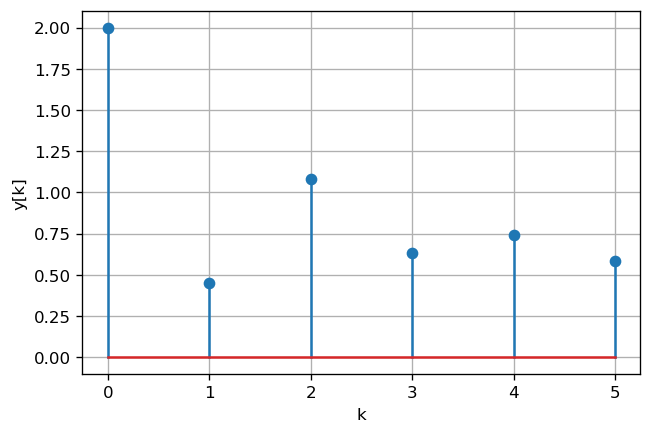

In [9]:
k = np.arange( 0, n, 1 )
plt.stem( k, Y_k)
plt.grid()
plt.xlabel('k')
plt.ylabel('y[k]')
plt.savefig( save_path( '1-b' ) )

In [10]:
u = lambda k: np.ones( len(k) ) if type(k) == list else 1
X_0 = np.array( [[0], [0]] )
n = 1000
X_k, Y_k = compute_y( A, B, C, D, X_0, u, n )

x_1 = []
x_2 = []
for x in X_k:
    x_1.append( x[0] )
    x_2.append( x[1] )    
    
print( np.linalg.inv( np.eye(2) - A ).dot(B) )

[[[26.66666667]]

 [[26.66666667]]]


<ipython-input-11-7ba03a683ca9>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem( x_1[:6], label='$x_1[k]$' )
<ipython-input-11-7ba03a683ca9>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines, baseline = plt.stem( x_2[:6], markerfmt='D', linefmt='grey', label='$x_2[k]$')


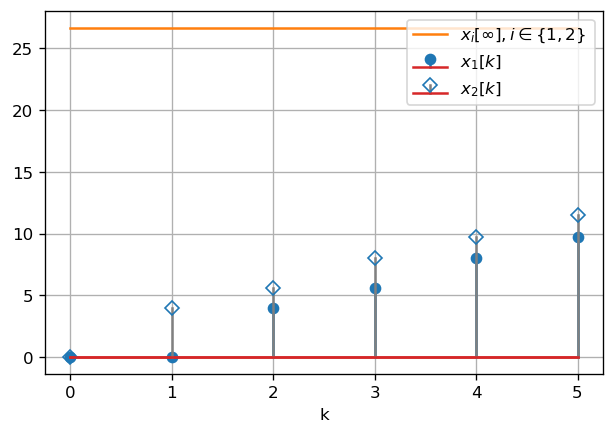

In [11]:
plt.stem( x_1[:6], label='$x_1[k]$' )
markerline, stemlines, baseline = plt.stem( x_2[:6], markerfmt='D', linefmt='grey', label='$x_2[k]$')
markerline.set_markerfacecolor( 'none' )
plt.plot( x_1[-1]*np.ones(6), label='$x_i[\infty], i \in \{ 1, 2 \}$ ' )
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('k')
plt.savefig( save_path( '1-d' ) )

## Ejercicio 2

In [12]:
A = np.array( [ [0, 1], [0, 4/5 ] ] )
B = np.array( [ [0], [1] ] )
C = np.array( [ 1, 0 ] )
D = np.array( [ 0 ] )

In [13]:
u = lambda k: 5 if k == 2 else 0
X_0 = np.array( [ [0], [0] ] )
n = 6
X_k, Y_k = compute_y( A, B, C, D, X_0 ,u, n )

<ipython-input-14-b2a4b7c403dc>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem( k, Y_k )


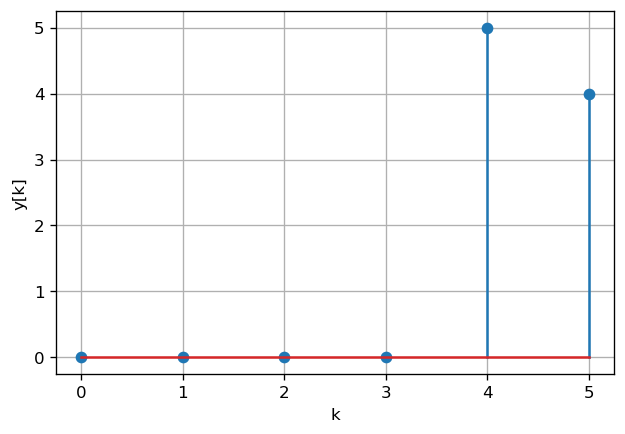

In [14]:
k = np.arange( 0, n, 1 )
plt.stem( k, Y_k )
plt.grid()
plt.xlabel( 'k' )
plt.ylabel( 'y[k]' )
plt.savefig( save_path( '2-b' ) )

In [15]:
x_1 = []
x_2 = []
for x in X_k[:-1]:
    x_1.append( x[0] )
    x_2.append( x[1] )

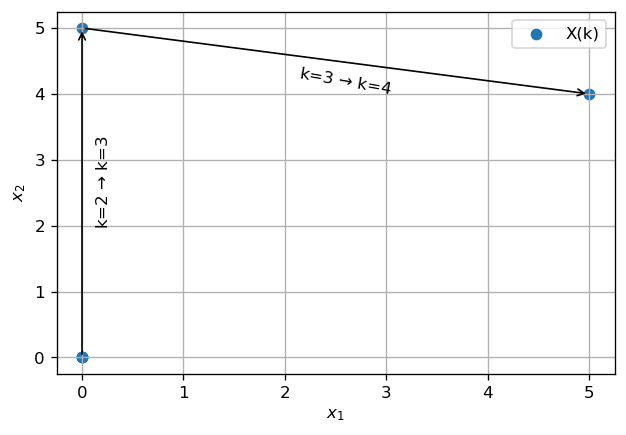

In [16]:
plt.scatter( x_1, x_2 )
plt.grid()
plt.xlabel( r'$x_1$' )
plt.ylabel( r'$x_2$' )
plt.legend( ['X(k)'] )
plt.annotate( "", (x_1[3], x_2[3]), (x_1[2], x_2[2]), arrowprops=dict(arrowstyle="->") )
plt.annotate( "", (x_1[4], x_2[4]), (x_1[3], x_2[3]), arrowprops=dict(arrowstyle="->") )
plt.annotate( r"k=2 $\to$ k=3", (0,2), (0.125,2), rotation=90 )
plt.annotate( r"k=3 $\to$ k=4", (4,2), (2.125,4), rotation=-10 )
plt.savefig( save_path('2-c') )

## Ejercicio 3

In [17]:
x_1 = lambda k: np.zeros( len(k) ) 
x_2 = lambda k: k 

In [18]:
k = np.linspace(-3, 3, 1000)
k_tick = []

for k_ in [0.48, 0.49, 0.5, 0.51,0.52]: 
    k_tick.append( '$x_1[0]$ + ' + str( round(k_ - 0.5, 2) ) )

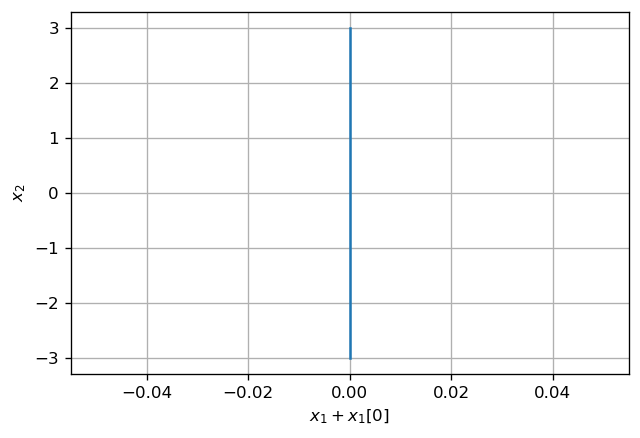

In [19]:
plt.plot( x_1(k), x_2(k) )
plt.grid()
plt.xlabel( '$x_1 + x_1[0]$' )
plt.ylabel( '$x_2$' )

plt.savefig( save_path('3-b') )

## Ejercicio 7

In [20]:
A = np.array( [ [0, 1], [9/20, 2/5] ] )
B = np.array( [ [0], [4] ] )
C = np.array( [ [1, 0] ] )
D = np.array( [0] )
u = lambda k: np.ones( len(k) ) if type(k) == list else 1

In [21]:
A = A - np.array( [[ 0, 0 ], [ 9/20, 2/5 ]] )

In [22]:
X_0 = np.array( [ [1/2], [2] ] )

In [23]:
X_k, Y_k = compute_y( A, B, C, D, X_0, u, 16 )

<ipython-input-24-842f110a8db8>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k , Y_k)


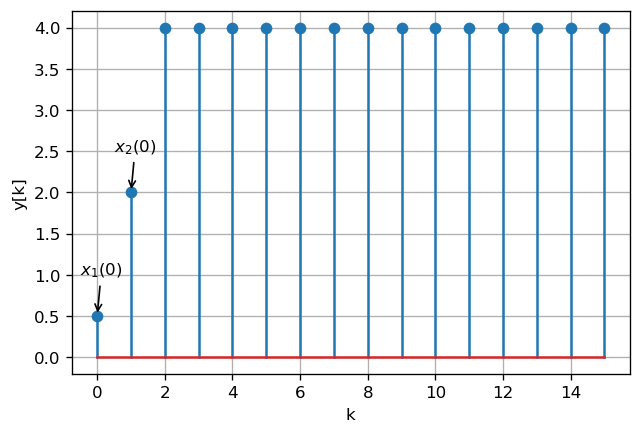

In [24]:
k = np.arange( 0, 16, 1 )
plt.stem(k , Y_k)
plt.grid()
plt.annotate( f"$x_1(0)$", (0, 1/2), (-.5,1), arrowprops=dict(arrowstyle="->") )
plt.annotate( f"$x_2(0)$", (1, 2), (.5,2.5), arrowprops=dict(arrowstyle="->") )
plt.xlabel( 'k' )
plt.ylabel( 'y[k]' )
plt.savefig( save_path( '7-c' ) )

## Ejercicio 8

In [25]:
l_1_a = 23/20
l_2_a = 57/20
l_1_b = 3/5
l_2_b = 19/30
A = lambda l_1, l_2: np.array( [ [ 0.5, 0.6 ], [0.3, 0.1] ] ) - np.array( [ [l_1, l_2], [0, 0] ] )
B = np.array( [ [1], [0] ] )
C = np.array( [ 1, 0 ] )
D = np.array( [ 0 ] )

In [26]:
u = lambda k: 1

In [27]:
n = 30
X_0 = np.array( [ [0], [0] ] )
X_k_a, Y_k_a = compute_y( A(l_1_a, l_2_a) , B, C, D, X_0, u, n )
X_k_b, Y_k_b = compute_y( A(l_2_b, l_2_b) , B, C, D, X_0, u, n )

<ipython-input-28-eddf899ba590>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[0].stem( k, Y_k_a, label=f'L=[ { round(l_1_a, 2) }, { round(l_2_a, 2) } ] ' + '- $\lambda \in${ 0.1, 0.25 }' )
<ipython-input-28-eddf899ba590>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[1].stem( k, Y_k_b, label=f'L=[ { round(l_1_b, 2) }, { round(l_2_b, 2) } ] ' + '- $\lambda \in${ 0 }' )


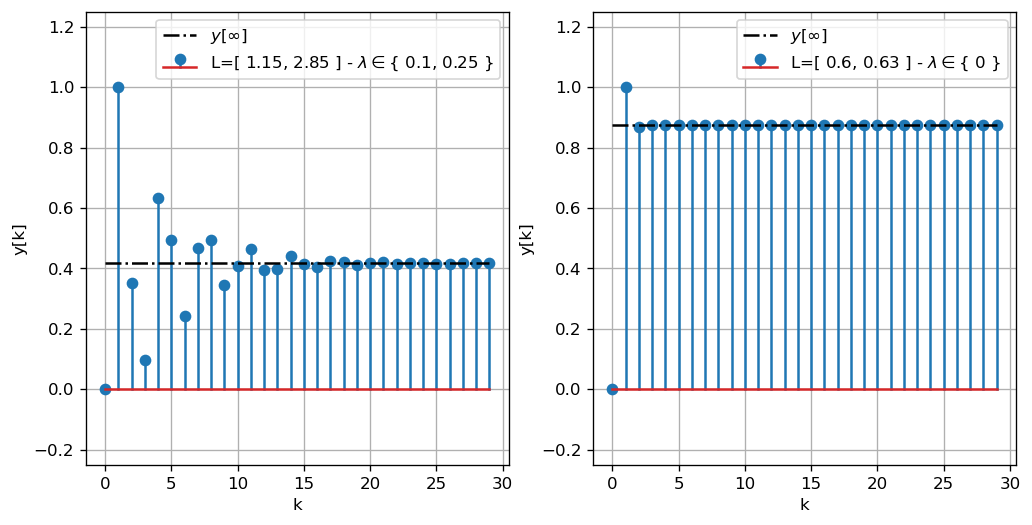

In [28]:
k = np.arange( 0, n, 1 )
fig, axs = plt.subplots( 1, 2, figsize=(10, 5) )
axs[0].stem( k, Y_k_a, label=f'L=[ { round(l_1_a, 2) }, { round(l_2_a, 2) } ] ' + '- $\lambda \in${ 0.1, 0.25 }' )
axs[1].stem( k, Y_k_b, label=f'L=[ { round(l_1_b, 2) }, { round(l_2_b, 2) } ] ' + '- $\lambda \in${ 0 }' )
axs[0].plot( k, Y_k_a[-1]*np.ones( len(k) ), '-.k', label='$y[\infty]$'  )
axs[1].plot( k, Y_k_b[-1]*np.ones( len(k) ), '-.k', label='$y[\infty]$'  )

for ax in axs:
    ax.grid()
    ax.set_xlabel( 'k' )
    ax.set_ylabel( 'y[k]' )
    ax.legend()
    ax.set_ylim( [-0.25, 1.25] )
   
plt.savefig( save_path( '8-c' ) )

## Ejercicio 9

In [29]:
A = np.array( [1, 2, 3] )
A.shape[0]
np.arange( -2+1, 1, 1 )[:-1]

array([-1])

## Ejercicio 10

In [30]:
def observer( A, psi ,y, u, k ):
    x = []
    k_min = A.shape[0] 
    ref_y = np.arange( 1 - k_min, 1, 1 )
    for i in range( k+1 ):
        if i < k_min:
            continue
        u_i = u( ref_y[:-1] + i ).reshape(-1,1)
        y_i = y( ref_y + i ).reshape( -1,1 )
        x.append( A.dot( y_i ) + psi.dot( u_i ) )
    return np.array( x )

In [203]:
def dinamic_observer( Phi, Gamma, C, K , y ,k, X_0 ):
    X = [ ]
    X_ans = X_0
    for i in range( k ):
        X.append( X_ans )
        X_ans = Phi.dot( X_ans ) + Gamma + K.dot( (y[i] - C.dot( X_ans )) ).reshape( 2, 1 )
        
    return X

In [204]:
a = 1 - np.exp( -1/4 )
omega = np.array( [ [ 0, a ** (-1) * np.exp( -1/4 ) ], [ 1 ,1 - a ** (-1) ] ] )
psi = np.array( [ [a- 1/4 * a**(-1) * np.exp(-1/4) + np.exp(-1/4)], [ a ** (-1)*1/4 - 1 ] ] )

In [205]:
Phi = np.array( [ [ np.exp( -1/4 ), 0 ], [ a, 1 ] ] )
Gamma = np.array( [ [a], [ 1/4 - a ] ] )
C = np.array( [ 1, 0 ] )
u = lambda k: np.piecewise( k, k>=0, [1, 0] )
def y( k ):
    X = np.array( [ [0], [0] ] )
    k_ = max( k )
    y_o = []
    for i in range( k_+1 ):
        y_o.append( C.dot( X ) )         
        X = Phi.dot( X ) + Gamma.dot( u(i) )
    return np.array(y_o[ min(k):max(k)+1 ])

<ipython-input-206-55a4f8dd651e>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem( k, y(k) )


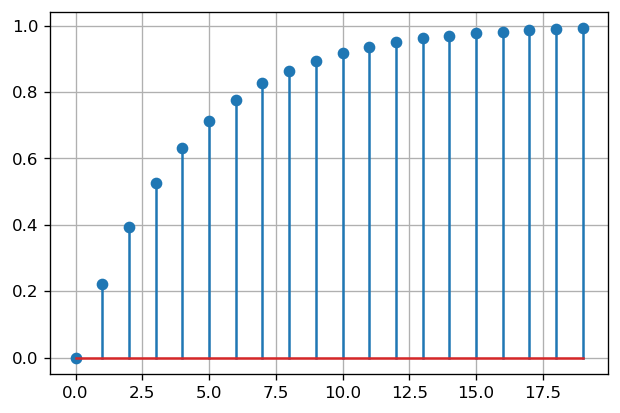

In [206]:
k = np.arange( 0, 20 )
plt.stem( k, y(k) )
plt.grid()

In [207]:
k_1 = - np.exp( -1/2 ) / ( 1 - np.exp( -1/4 ) )
k_2 = 1 + np.exp( -1/4 )
n = 300
k = np.arange( n )
K = np.array( [ [k_1], [k_2] ] )
X = np.array( [ [0], [0] ] )
x_o = observer( omega, psi, y, u, n )
x_do = dinamic_observer( Phi, Gamma, C, K ,y(k), n, X )

In [208]:
X_do = separate_states( np.array(x_do), 2 )
X_o = separate_states( np.array( x_o ), 2 )

{1: [], 2: []}
{1: [], 2: []}


In [209]:
X_1 = []
X_2 = []
X = np.array( [ [0], [0] ] )
for x_ in x_o:
    X_1.append( X[0] )
    X_2.append( X[1] )
    X = (Phi.dot( X ) + Gamma).reshape( 2,1 )

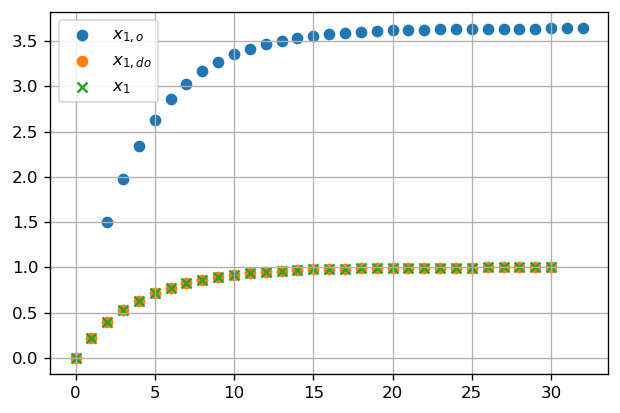

In [210]:
k_max = 30
k = np.arange( 0, k_max + 1, 1 )
plt.scatter( k+2, np.array(X_o[1][:k_max+1]), label='$x_{1,o}$' )
plt.scatter( k, X_do[1][:k_max+1], label='$x_{1,do}$' )
plt.scatter( k, X_1[:k_max+1], label='$x_1$', marker='x' )
plt.legend()
plt.grid()

## Ejercicio 11

In [211]:
l2 = 7 / 20
l1 = l2 / 2
Phi_LC = np.array( [ [ 0, 1 ], [ 9/20 - 4*l1, 2/5 - 4*l2 ] ] )
Gamma = np.array( [ [0],[4] ] )
C = np.array( [ 1, 0 ] )

In [212]:
n = 15
k = np.arange( n )
X0 = np.array( [ 0, 0 ] ).reshape( 2, 1 )

In [213]:
X_1 = []
X_2 = []
Y = []
X = X0
for i in k:
    X_1.append( X[0] )
    X_2.append( X[1] )
    Y.append( C.dot( X ) )
    X = Phi_LC.dot( X ) + Gamma
    

In [248]:
K = np.array( [ 9/5, 2.99 ] ).reshape( 2,1 )
Xo = dinamic_observer( Phi_LC, Gamma, C, K, Y, n, np.array( [ 0, 0] ).reshape( 2, 1 ) )
x_do = separate_states( np.array( Xo ), 2 )

{1: [], 2: []}


In [249]:
Yo = []
for x_o in Xo:
    Yo.append( C.dot( x_o ) )

<ipython-input-264-7d608bb90ad3>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines, baseline = axs[0].stem( k, Y, label='y[k]', linefmt=None )
<ipython-input-264-7d608bb90ad3>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines, baseline = axs[0].stem( k, Yo, label='$y_o[k]$', linefmt='grey', markerfmt='D' )


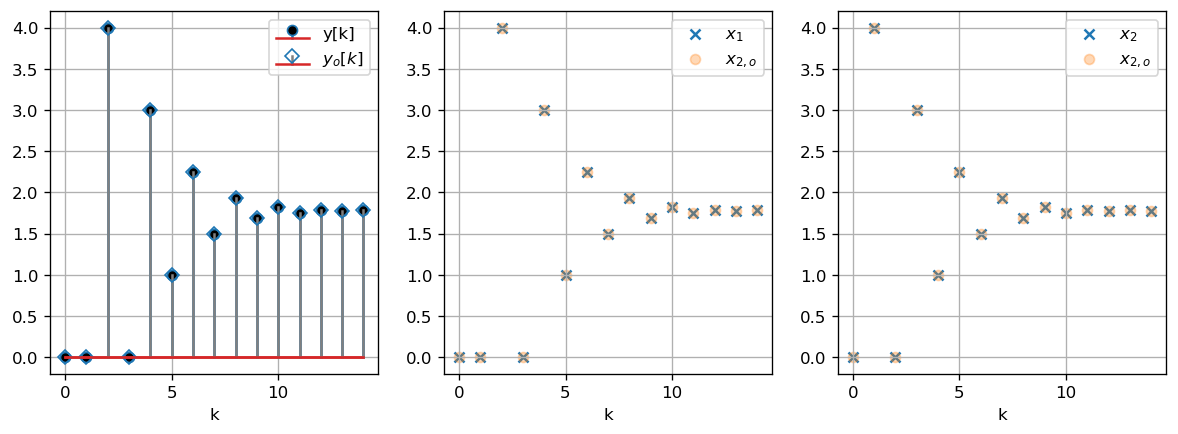

In [264]:
alpha = .3
fig, axs = plt.subplots( 1, 3, figsize=(12, 4) )
markerline, stemlines, baseline = axs[0].stem( k, Y, label='y[k]', linefmt=None )

markerline.set_markerfacecolor( 'k' )

markerline, stemlines, baseline = axs[0].stem( k, Yo, label='$y_o[k]$', linefmt='grey', markerfmt='D' )
markerline.set_markerfacecolor('none')
axs[1].scatter( k, X_1, marker='x', label='$x_1$' )
axs[2].scatter( k, X_2, marker='x', label='$x_2$' )
axs[1].scatter( k, x_do[1], label='$x_{2,o}$', alpha=alpha )
axs[2].scatter( k, x_do[2], label='$x_{2,o}$', alpha=alpha )


for ax in axs:
    ax.grid()
    ax.set_xlabel( 'k' )
    ax.legend()
    
plt.savefig( save_path( '11-c-d' ) )